In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime


In [6]:
start = '202-01-01'
endd = '2023-03-03'
yf.pdr_override()
y_symbols = ['AAPL']
startdate = datetime(2010,1,1)
enddate = datetime(2023,3,3)
data = pdr.get_data_yahoo(y_symbols, startdate, enddate)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412875,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401016,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443573,447610800


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-24,147.110001,147.190002,145.720001,146.710007,146.710007,55469600
2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500
2023-02-28,147.050003,149.080002,146.830002,147.410004,147.410004,50547000
2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000
2023-03-02,144.380005,146.710007,143.899994,145.910004,145.910004,52238100


In [4]:
df=data.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412873,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401019,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443577,447610800


In [7]:
df =df.drop(['Date','Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


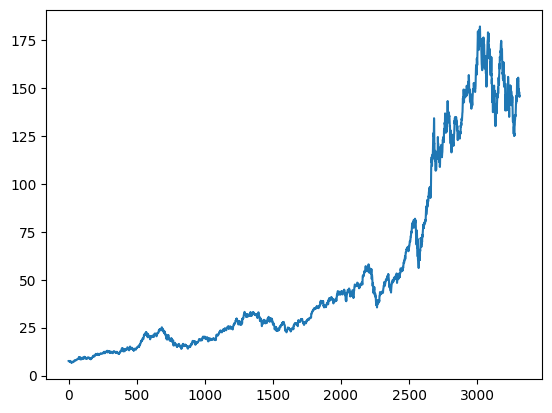

In [8]:
plt.plot(df.Close)

In [9]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3308,147.110001,147.190002,145.720001,146.710007,55469600
3309,147.710007,149.169998,147.449997,147.919998,44998500
3310,147.050003,149.080002,146.830002,147.410004,50547000
3311,146.830002,147.229996,145.009995,145.309998,55479000


In [10]:
ma100 =df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3308    142.920499
3309    142.975199
3310    142.988299
3311    142.977399
3312    142.982199
Name: Close, Length: 3313, dtype: float64

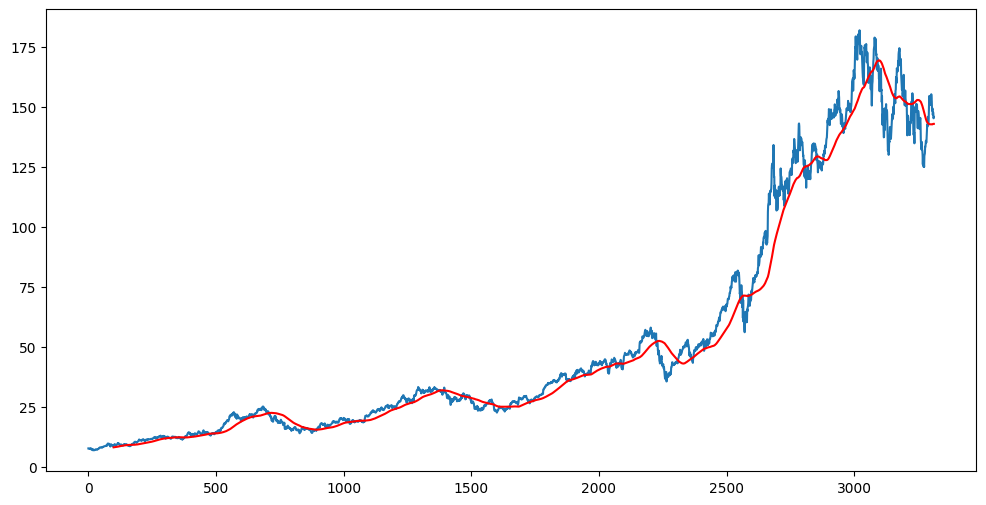

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [12]:
ma200 =df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3308    147.20060
3309    147.16765
3310    147.17220
3311    147.18595
3312    147.17995
Name: Close, Length: 3313, dtype: float64

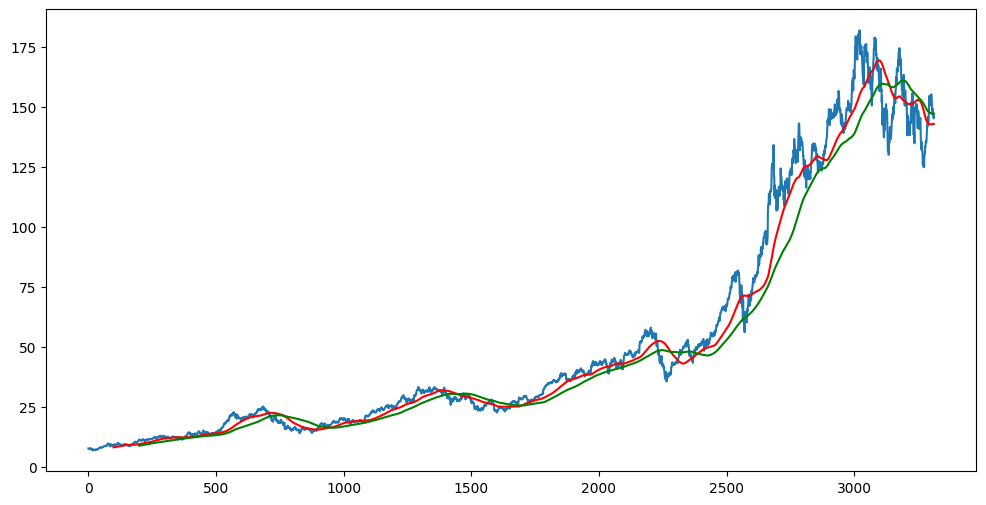

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'green')

In [14]:
df.shape

(3313, 5)

In [15]:
#Splitting data into traning and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2319, 1)
(994, 1)


In [16]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [17]:
data_testing.head()

,Close
2319,47.762501
2320,47.185001
2321,46.697498
2322,47.117500
2323,47.180000


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.77745661],
       [0.78542206],
       [0.81928732]])

In [20]:
data_training_array.shape

(2319, 1)

In [21]:
x_train =[]
y_train =[]

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train ,y_train=np.array(x_train),np.array(y_train) 

In [22]:
x_train.shape

(2219, 100, 1)

In [23]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
model =Sequential()
model.add(LSTM(units= 50,activation ='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units= 60,activation ='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units= 80,activation ='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units= 100,activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               7

In [27]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
70/70 [==============================] - 27s 295ms/step - loss: 0.0312
Epoch 2/50
70/70 [==============================] - 30s 432ms/step - loss: 0.0065
Epoch 3/50
70/70 [==============================] - 20s 288ms/step - loss: 0.0062
Epoch 4/50
70/70 [==============================] - 22s 312ms/step - loss: 0.0066
Epoch 5/50
70/70 [==============================] - 20s 286ms/step - loss: 0.0051
Epoch 6/50
70/70 [==============================] - 23s 335ms/step - loss: 0.0049
Epoch 7/50
70/70 [==============================] - 20s 289ms/step - loss: 0.0047
Epoch 8/50
70/70 [==============================] - 22s 314ms/step - loss: 0.0047
Epoch 9/50
70/70 [==============================] - 20s 287ms/step - loss: 0.0044
Epoch 10/50
70/70 [==============================] - 22s 310ms/step - loss: 0.0043
Epoch 11/50
70/70 [==============================] - 21s 294ms/step - loss: 0.0038
Epoch 12/50
70/70 [==============================] - 20s 284ms/step - loss: 0.0034
Epoch 13/50
7

In [28]:
model.save('/content/drive/MyDrive/model/keras_models.h5')

In [29]:
data_testing.head()

,Close
2319,47.762501
2320,47.185001
2321,46.697498
2322,47.117500
2323,47.180000


In [30]:
data_training.tail()

,Close
2314,46.529999
2315,47.005001
2316,46.632500
2317,47.040001
2318,48.772499


In [31]:
past_100_days=data_training.tail(100)

In [32]:
#final_df=past_100_days.append(data_testing,ignore_index=True)
#df = pd.concat([df, pd.DataFrame.from_records([{ 'a': 1, 'b': 2 }])])
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)

In [33]:
final_df.head()

,Close
0,54.950001
1,54.075001
2,53.060001
3,53.325001
4,54.715000


In [34]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.13247419],
       [0.12649996],
       [0.11956987],
       ...,
       [0.76376211],
       [0.74942392],
       [0.75352058]])

In [35]:
input_data.shape

(1094, 1)

In [36]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [37]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(994, 100, 1)
(994,)


In [38]:
#making prediction
y_predicted=model.predict(x_test)

32/32 [==============================] - 3s 71ms/step


In [39]:
y_predicted.shape

(994, 1)

In [40]:
y_test

array([0.08340019, 0.07945721, 0.07612869, 0.07899633, 0.07942306,
       0.08152257, 0.08372451, 0.08846975, 0.09073996, 0.09132031,
       0.09355637, 0.09884784, 0.09782367, 0.09973542, 0.09688486,
       0.09674831, 0.0973628 , 0.09739694, 0.10401981, 0.10526585,
       0.10640949, 0.1114449 , 0.1108987 , 0.10768968, 0.1060169 ,
       0.10654605, 0.09982077, 0.11663396, 0.11429546, 0.11873346,
       0.11315182, 0.10355893, 0.1036272 , 0.09990612, 0.0938636 ,
       0.0743023 , 0.07932065, 0.08317828, 0.08174448, 0.079901  ,
       0.06981308, 0.0758044 , 0.06928394, 0.06395836, 0.06278058,
       0.06151744, 0.06006658, 0.06163694, 0.05612359, 0.05310233,
       0.06392421, 0.06887427, 0.07344884, 0.08186395, 0.08601178,
       0.08981821, 0.08875993, 0.08869163, 0.08628489, 0.08824784,
       0.0960314 , 0.09504138, 0.09775541, 0.09659469, 0.09625331,
       0.09111549, 0.09833576, 0.09823335, 0.09512674, 0.10132287,
       0.10333702, 0.10620467, 0.10589741, 0.09871128, 0.10079

In [41]:
y_predicted.shape

(994, 1)

In [42]:
scaler.scale_

array([0.00682769])

In [43]:
scale_factor=1/0.00682769
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

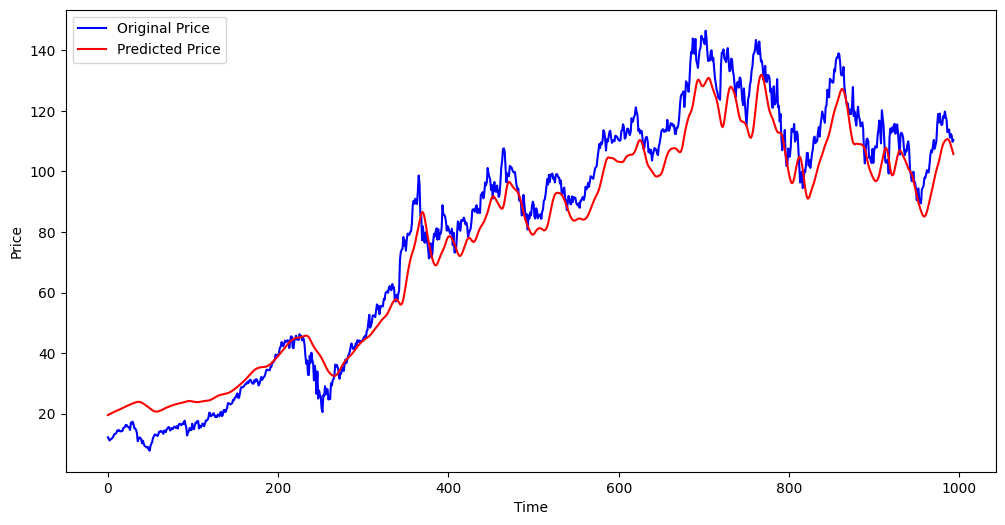

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()